In [1]:
import numpy as np 
import pandas as pd 

import os

import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import seaborn as sns
from sklearn.feature_selection import RFE 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read the file 
# this data has been randomised in Excel 
# all data are numerical
# if categorical, need one hot enconding 
# ref https://towardsdatascience.com/end-to-end-case-study-bike-sharing-demand-dataset-53201926c8db

data = pd.read_csv("/content/LDPEwholedata.csv")

data

,percentage,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,...,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075
0,1.7,0.169127,0.150590,0.231813,0.234833,0.184851,0.158555,0.148234,0.152607,0.164394,0.160773,0.132959,0.113796,0.115777,0.146554,0.145845,0.121738,0.128424,0.143774,0.154126,0.125625,0.094115,0.088043,0.110611,0.134111,0.119743,0.116791,0.125832,0.108131,0.100397,0.115159,0.120570,0.116286,0.106144,0.107198,0.115742,0.116199,0.110499,0.103061,0.110475,...,0.464727,0.464724,0.463955,0.463912,0.462743,0.461998,0.466319,0.467089,0.464166,0.466329,0.466572,0.464036,0.466466,0.468567,0.467820,0.467458,0.469015,0.472651,0.472744,0.470113,0.467323,0.474300,0.481249,0.474546,0.473930,0.475799,0.467945,0.472449,0.484107,0.480268,0.473175,0.469135,0.476844,0.479974,0.475397,0.472840,0.472882,0.475511,0.478768,0.480846
1,1.5,0.152296,0.167122,0.148614,0.101726,0.057062,0.053919,0.082546,0.113526,0.072165,0.046138,0.080207,0.082247,0.078132,0.104324,0.097960,0.068808,0.074863,0.083281,0.082985,0.067677,0.053353,0.053145,0.080483,0.104062,0.077278,0.075195,0.096232,0.073248,0.061739,0.082336,0.095084,0.095173,0.082688,0.076746,0.078339,0.081442,0.077833,0.069106,0.076691,...,0.389909,0.391044,0.391004,0.389015,0.388010,0.388234,0.388414,0.389512,0.390958,0.390367,0.388571,0.387211,0.391667,0.393989,0.390918,0.390094,0.392684,0.397566,0.393201,0.389619,0.396698,0.399769,0.397994,0.393766,0.394498,0.397139,0.394035,0.395904,0.400945,0.399939,0.394400,0.389675,0.400842,0.402683,0.393090,0.396116,0.400041,0.399640,0.393784,0.389070
2,2.5,0.283656,0.204254,0.219899,0.259702,0.283799,0.249840,0.220204,0.217860,0.235351,0.235512,0.203356,0.176770,0.168431,0.182713,0.220423,0.245886,0.179888,0.134206,0.133158,0.149002,0.157303,0.143877,0.140116,0.142984,0.142131,0.133995,0.124781,0.134396,0.139411,0.131040,0.133611,0.136367,0.125852,0.127833,0.138191,0.137013,0.131717,0.126465,0.128796,...,0.516812,0.516988,0.516253,0.518961,0.517958,0.514530,0.515309,0.518607,0.522204,0.520146,0.520471,0.524324,0.522631,0.521809,0.524328,0.523006,0.521848,0.523896,0.527357,0.527156,0.520049,0.521662,0.525695,0.521566,0.521721,0.526141,0.530572,0.532983,0.532547,0.529209,0.525898,0.523428,0.520406,0.524397,0.532995,0.528254,0.524748,0.527618,0.531247,0.534055
3,9.5,0.123937,0.087646,0.133636,0.126664,0.084912,0.083526,0.077894,0.070636,0.114871,0.128116,0.082968,0.073688,0.082381,0.075803,0.081257,0.087577,0.059815,0.040578,0.045152,0.059897,0.076281,0.089619,0.085775,0.072268,0.063054,0.062074,0.064859,0.052277,0.048932,0.063003,0.069848,0.065787,0.050249,0.048612,0.056579,0.051919,0.049629,0.053534,0.057700,...,0.336495,0.339255,0.340493,0.338312,0.337972,0.339556,0.340108,0.340152,0.340332,0.342638,0.343959,0.343035,0.339906,0.338685,0.340643,0.339128,0.338793,0.342558,0.343816,0.342252,0.339404,0.345663,0.351727,0.344291,0.345477,0.351205,0.347683,0.348340,0.351183,0.344977,0.343629,0.347587,0.346397,0.347122,0.349642,0.345319,0.344363,0.348834,0.348414,0.347830
4,7.0,0.187103,0.123261,0.140645,0.115779,0.075044,0.107201,0.120550,0.105291,0.103154,0.103405,0.101665,0.111813,0.118849,0.105047,0.105290,0.112805,0.095294,0.085609,0.088936,0.076606,0.066698,0.072907,0.078383,0.081383,0.083563,0.076411,0.064403,0.066899,0.067434,0.060385,0.064724,0.069090,0.060035,0.063502,0.074597,0.070005,0.068971,0.075505,0.077373,...,0.286432,0.286648,0.286364,0.286042,0.287360,0.289781,0.291168,0.291468,0.290749,0.289445,0.288414,0.288193,0.289136,0.290198,0.290973,0.292953,0.293585,0.291672,0.292721,0.294711,0.295147,0.295771,0.297353,0.300221,0.296871,0.291129,0.291568,0.298870,0.306304,0.298682,0.295827,0.301153,0.308130,0.310556,0.307015,0.302051,0.298862,0.298959,0.301751,0.300435
...,...,...,...,...,...

In [3]:
# convert data into arrays 

# labels is what we want to predict, i.e. MPs %
labels = np.array(data['percentage'])

# next, separate the labels from the data body 
train = data.drop('percentage', axis = 1)
# print data body
train

,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,...,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075
0,0.169127,0.150590,0.231813,0.234833,0.184851,0.158555,0.148234,0.152607,0.164394,0.160773,0.132959,0.113796,0.115777,0.146554,0.145845,0.121738,0.128424,0.143774,0.154126,0.125625,0.094115,0.088043,0.110611,0.134111,0.119743,0.116791,0.125832,0.108131,0.100397,0.115159,0.120570,0.116286,0.106144,0.107198,0.115742,0.116199,0.110499,0.103061,0.110475,0.117854,...,0.464727,0.464724,0.463955,0.463912,0.462743,0.461998,0.466319,0.467089,0.464166,0.466329,0.466572,0.464036,0.466466,0.468567,0.467820,0.467458,0.469015,0.472651,0.472744,0.470113,0.467323,0.474300,0.481249,0.474546,0.473930,0.475799,0.467945,0.472449,0.484107,0.480268,0.473175,0.469135,0.476844,0.479974,0.475397,0.472840,0.472882,0.475511,0.478768,0.480846
1,0.152296,0.167122,0.148614,0.101726,0.057062,0.053919,0.082546,0.113526,0.072165,0.046138,0.080207,0.082247,0.078132,0.104324,0.097960,0.068808,0.074863,0.083281,0.082985,0.067677,0.053353,0.053145,0.080483,0.104062,0.077278,0.075195,0.096232,0.073248,0.061739,0.082336,0.095084,0.095173,0.082688,0.076746,0.078339,0.081442,0.077833,0.069106,0.076691,0.085247,...,0.389909,0.391044,0.391004,0.389015,0.388010,0.388234,0.388414,0.389512,0.390958,0.390367,0.388571,0.387211,0.391667,0.393989,0.390918,0.390094,0.392684,0.397566,0.393201,0.389619,0.396698,0.399769,0.397994,0.393766,0.394498,0.397139,0.394035,0.395904,0.400945,0.399939,0.394400,0.389675,0.400842,0.402683,0.393090,0.396116,0.400041,0.399640,0.393784,0.389070
2,0.283656,0.204254,0.219899,0.259702,0.283799,0.249840,0.220204,0.217860,0.235351,0.235512,0.203356,0.176770,0.168431,0.182713,0.220423,0.245886,0.179888,0.134206,0.133158,0.149002,0.157303,0.143877,0.140116,0.142984,0.142131,0.133995,0.124781,0.134396,0.139411,0.131040,0.133611,0.136367,0.125852,0.127833,0.138191,0.137013,0.131717,0.126465,0.128796,0.131129,...,0.516812,0.516988,0.516253,0.518961,0.517958,0.514530,0.515309,0.518607,0.522204,0.520146,0.520471,0.524324,0.522631,0.521809,0.524328,0.523006,0.521848,0.523896,0.527357,0.527156,0.520049,0.521662,0.525695,0.521566,0.521721,0.526141,0.530572,0.532983,0.532547,0.529209,0.525898,0.523428,0.520406,0.524397,0.532995,0.528254,0.524748,0.527618,0.531247,0.534055
3,0.123937,0.087646,0.133636,0.126664,0.084912,0.083526,0.077894,0.070636,0.114871,0.128116,0.082968,0.073688,0.082381,0.075803,0.081257,0.087577,0.059815,0.040578,0.045152,0.059897,0.076281,0.089619,0.085775,0.072268,0.063054,0.062074,0.064859,0.052277,0.048932,0.063003,0.069848,0.065787,0.050249,0.048612,0.056579,0.051919,0.049629,0.053534,0.057700,0.058855,...,0.336495,0.339255,0.340493,0.338312,0.337972,0.339556,0.340108,0.340152,0.340332,0.342638,0.343959,0.343035,0.339906,0.338685,0.340643,0.339128,0.338793,0.342558,0.343816,0.342252,0.339404,0.345663,0.351727,0.344291,0.345477,0.351205,0.347683,0.348340,0.351183,0.344977,0.343629,0.347587,0.346397,0.347122,0.349642,0.345319,0.344363,0.348834,0.348414,0.347830
4,0.187103,0.123261,0.140645,0.115779,0.075044,0.107201,0.120550,0.105291,0.103154,0.103405,0.101665,0.111813,0.118849,0.105047,0.105290,0.112805,0.095294,0.085609,0.088936,0.076606,0.066698,0.072907,0.078383,0.081383,0.083563,0.076411,0.064403,0.066899,0.067434,0.060385,0.064724,0.069090,0.060035,0.063502,0.074597,0.070005,0.068971,0.075505,0.077373,0.073289,...,0.286432,0.286648,0.286364,0.286042,0.287360,0.289781,0.291168,0.291468,0.290749,0.289445,0.288414,0.288193,0.289136,0.290198,0.290973,0.292953,0.293585,0.291672,0.292721,0.294711,0.295147,0.295771,0.297353,0.300221,0.296871,0.291129,0.291568,0.298870,0.306304,0.298682,0.295827,0.301153,0.308130,0.310556,0.307015,0.302051,0.298862,0.298959,0.301751,0.300435
...,.

In [4]:
# FS ref: https://www.kaggle.com/rafjaa/dealing-with-very-small-datasets
# "Caution: for a very small dataset, very robust local validation is required to determine whether or not a feature contributes to the final solution.
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

from sklearn.ensemble import RandomForestRegressor

TOP_FEATURES = 15

forest = RandomForestRegressor()
forest.fit(train, labels) 

importances = forest.feature_importances_
std = np.std(
    [tree.feature_importances_ for tree in forest.estimators_],
    axis=0
)
indices = np.argsort(importances)[::-1]
indices = indices[:TOP_FEATURES]

print('Top features:')
for f in range(TOP_FEATURES):
    print('%d. feature %d (%f)' % (f + 1, indices[f], importances[indices[f]]))

Top features:
1. feature 747 (0.111246)
2. feature 22 (0.057895)
3. feature 451 (0.050522)
4. feature 4 (0.031521)
5. feature 444 (0.029130)
6. feature 438 (0.023380)
7. feature 436 (0.023176)
8. feature 440 (0.022828)
9. feature 457 (0.022067)
10. feature 13 (0.019543)
11. feature 47 (0.019027)
12. feature 12 (0.018543)
13. feature 731 (0.017387)
14. feature 458 (0.016932)
15. feature 443 (0.016906)


In [5]:
# export useful columns 
# keep selected features 
# ref: https://stackoverflow.com/questions/50249924/export-some-columns-to-new-csv-file-from-existing-dataframe

useful = [0,748,23,452,5,445,439,437,441,458,14,48,13,732,459,444] 
# +1 to each from selected features because original dataframe starts at columnn 2 for data 

data.iloc[:,useful].to_csv('LDPEselected.csv')

In [6]:
# reload to check 

selected  = pd.read_csv("/content/LDPEselected.csv")

selected

,Unnamed: 0,percentage,1072,347,776,329,769,763,761,765,782,338,372,337,1056,783,768
0,0,1.7,0.472882,0.110611,0.433775,0.184851,0.431714,0.429678,0.429107,0.430289,0.435069,0.146554,0.109438,0.115777,0.467323,0.435339,0.431449
1,1,1.5,0.400041,0.080483,0.366263,0.057062,0.364453,0.362647,0.362354,0.363272,0.367271,0.104324,0.084194,0.078132,0.396698,0.367447,0.364257
2,2,2.5,0.524748,0.140116,0.477189,0.283799,0.474945,0.472692,0.471864,0.473520,0.479182,0.182713,0.125918,0.168431,0.520049,0.479449,0.474477
3,3,9.5,0.344363,0.085775,0.314590,0.084912,0.312797,0.311131,0.310572,0.311725,0.315688,0.075803,0.065040,0.082381,0.339404,0.315867,0.312683
4,4,7.0,0.298862,0.078383,0.271202,0.075044,0.269788,0.268244,0.267481,0.268685,0.272144,0.105047,0.063617,0.118849,0.295147,0.272408,0.269475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,225,0.3,0.390363,0.120756,0.392951,0.296613,0.396273,0.396031,0.395558,0.396471,0.386936,0.182412,0.079302,0.169838,0.380575,0.385789,0.396431
226,226,8.0,0.345806,0.107554,0.318244,0.123015,0.316431,0.314547,0.314121,0.315069,0.319269,0.091794,0.085298,0.123539,0.335825,0.319435,0.316170
227,227,1.2,0.352900,0.063521,0.310057,0.066840,0.308149,0.306034,0.305524,0.306780,0.311147,0.037708,0.064524,0.034167,0.345630,0.311277,0.307568
228,228,0.7,0.426328,0.192700,0.418059,0.506438,0.421686,0.421385,0.420982,0.422101,0.411887,0.298953,0.103187,0.293630,0.413536,0.410640,0.422109


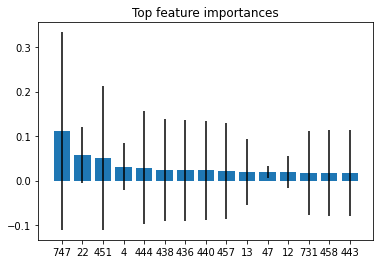

In [7]:
# graph probably not important 

plt.figure()
plt.title('Top feature importances')
plt.bar( 
    range(TOP_FEATURES), 
    importances[indices],
    yerr=std[indices], 
)
plt.xticks(range(TOP_FEATURES), indices)
plt.show()